<a href="https://colab.research.google.com/github/JuanGarcia88/Maquinas_II/blob/main/Ejemplo_MAQUINAS_AC_ASINCRONA_MOTORWEG_Variacion_Fe_JD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color="RED"><center>Seleccion del motor Asincrono catalogo WEG**
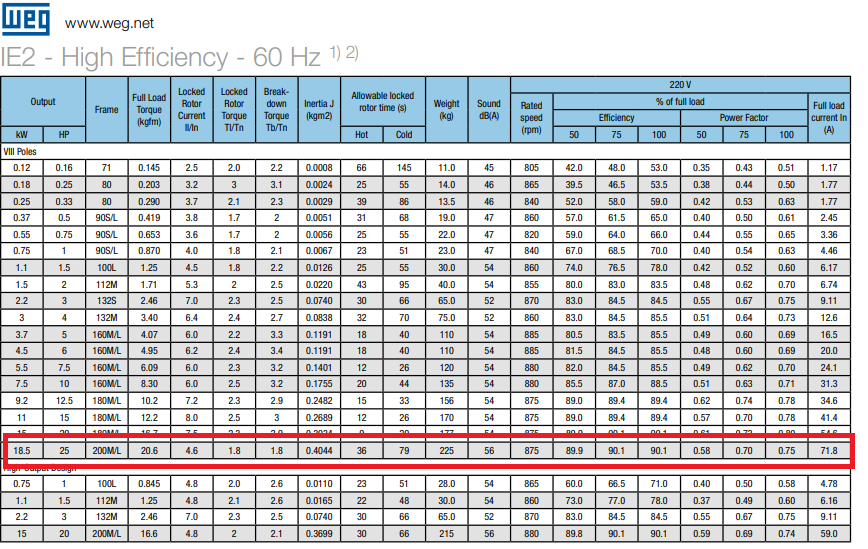

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cmath
from scipy.interpolate import make_interp_spline
from scipy.optimize import root_scalar

In [ ]:
V_n_Linea = 220/((3)**0.5)
Vn = 220
f = 60
Pn_w = 18.5*(10**3)
Pp = 8
Pn_hp = 25
Tn = 202.02 ## se convierte unidad a Newton por metro
In = 71.8
Il = 71.8 * 4.6 ## corriente de arranque
Tl = 202.02 * 1.8 ## torque de arranque
Tb = 202.02 * 1.8 ##torque de rompimiento
Ij = 0.4044 ##inercia
Nn = 875
##motor a plena carga
Ef = 90.1
fp = 0.75
print(V_n_Linea)
print(Il)
print(Tl)
print(Tb)

127.01705922171767
330.28
363.636
363.636


# **<font color="blue"><center>Estimacion utilizando "Asynchronous Machine" y en matlab**

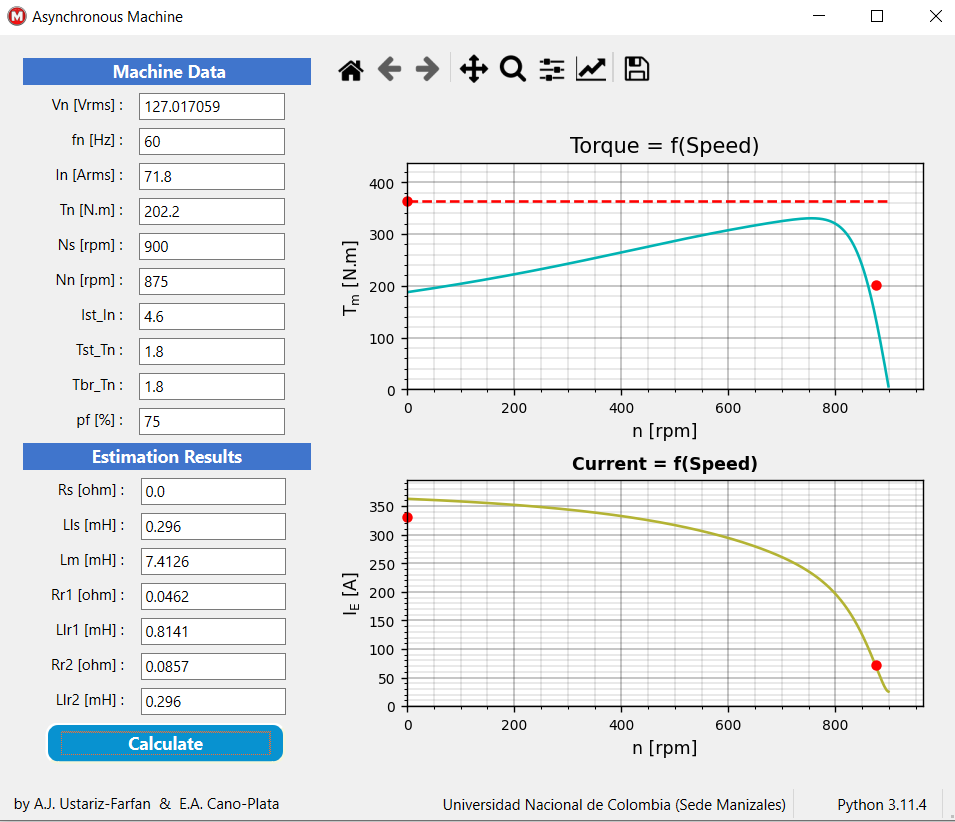

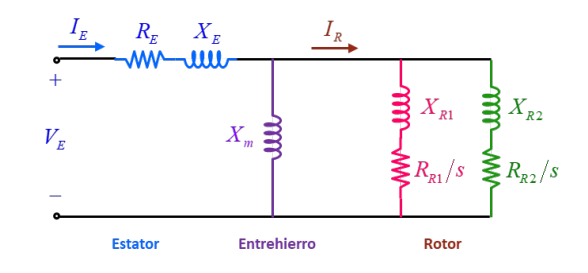

In [ ]:
Rs = 0.0
Xs = (2*np.pi*f)*(0.2583*(10**-3))
Xm = (2*np.pi*f)*(5.8147*(10**-3))
R1 = 0.0789
X1 = (2*np.pi*f)*(1.0783*(10**-3))
R2 = 0.0804
X2 = (2*np.pi*f)*(0.2583*(10**-3))
Ns = 900
Nr = 875

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cmath

In [ ]:
Sn = (Ns - Nr ) / Ns
print(Sn)

0.027777777777777776


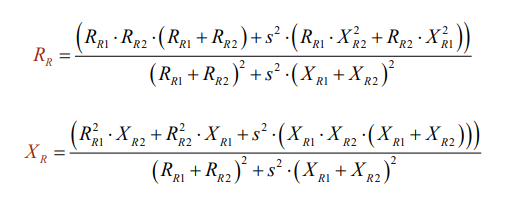

In [ ]:
Rr_N = ((((R1*R2)*(R1 + R2)+Sn**2)*(R1*(X2**2))+(R2*(X1**2))))/((((R1+R2)**2)+(Sn**2))*((X1+X2)**2))
Rr_St = ((((R1*R2)*(R1 + R2)+1**2)*(R1*(X2**2))+(R2*(X1**2))))/((((R1+R2)**2)+(1**2))*((X1+X2)**2))
Rr_V = (((R1*R2)*(R1 + R2)+0.00000001**2)*(R1*X2**2)+(R2*X1**2))/(((R1+R2)**2+0.00000001**2)*(X1+X2)**2)
print(Rr_N)
print(Rr_St)
print(Rr_V)

2.0014091137554333
0.05390934362984533
2.062174946050322


In [ ]:
Xr_N = (((R1 *X2 + (R2**2)*X1+(Sn**2))*((X1*X2)*(X1+X2))))/((R1+R2)**2 + (Sn**2)*((X1+X2)**2))
Xr_St = (((R1 *X2 + (R2**2)*X1+(1**2))*((X1*X2)*(X1+X2))))/((R1+R2)**2 + (1**2)*((X1+X2)**2))
Xr_V = (((R1 *X2 + (R2**2)*X1+(0.00000001**2))*((X1*X2)*(X1+X2))))/((R1+R2)**2 + (0.00000001**2)*((X1+X2)**2))
print(Xr_N)
print(Xr_St)
print(Xr_V)

0.008644109278265751
0.07215678971788422
0.008104355455561027


In [ ]:
Zeq_N = complex(Rr_N, Xr_N)
Zeq_St = complex(Rr_St, Xr_St)
Zeq_V = complex( Rr_V, Xr_V)

r1, theta1 = abs(Zeq_N), cmath.phase(Zeq_N)
r2, theta2 = abs(Zeq_St), cmath.phase(Zeq_St)
r3, theta3 = abs(Zeq_V), cmath.phase(Zeq_V)

print(Zeq_N)
print(f"Forma polar: {r1}∠{theta1} ")
print(Zeq_St)
print(f"Forma polar: {r2}∠{theta2} ")

(2.0014091137554333+0.008644109278265751j)
Forma polar: 2.0014277806727185∠0.00431898479465543 
(0.05390934362984533+0.07215678971788422j)
Forma polar: 0.09007119202603964∠0.9291448551397515 


In [ ]:
Ie_star = (V_n_Linea)/r2
Ie_N = (V_n_Linea)/r1
Ie_V = (V_n_Linea)/r3

print(Ie_star)
print(Ie_N)
print(Ie_V)

1410.185169804314
63.463223828653355
61.59326035433987


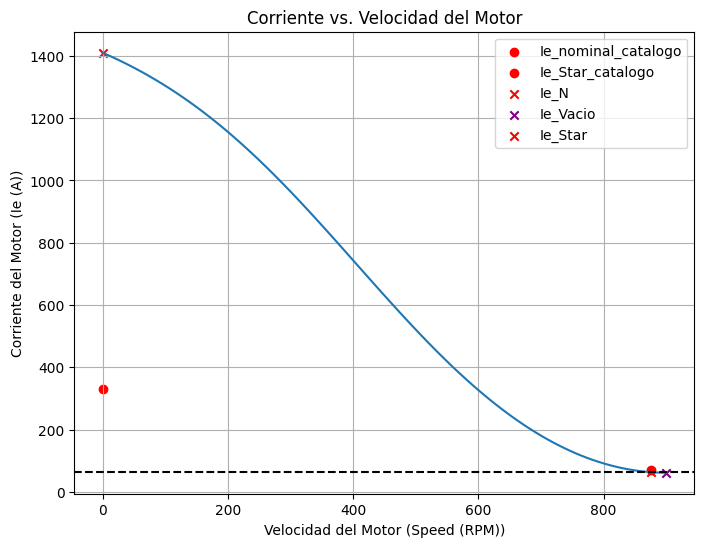

In [ ]:
Speed = np.linspace(0, 900, 100)
Sn_plot=(900-Speed)/900
Rr_plot = ((((R1*R2)*(R1 + R2)+Sn_plot**2)*(R1*(X2**2))+(R2*(X1**2))))/((((R1+R2)**2)+(Sn_plot**2))*((X1+X2)**2))
Xr_plot = (((R1 *X2 + (R2**2)*X1+(Sn_plot**2))*((X1*X2)*(X1+X2))))/((R1+R2)**2 + (Sn_plot**2)*((X1+X2)**2))
Zeq_plot = [complex(r, x) for r, x in zip(Rr_plot, Xr_plot)]

rplot = np.abs(Zeq_plot)
thetaplot = np.angle(Zeq_plot)
Ie = (V_n_Linea)/rplot

y2=Ie_N
plt.figure(figsize=(8, 6))
plt.plot(Speed, Ie)
plt.xlabel('Velocidad del Motor (Speed (RPM))')
plt.ylabel('Corriente del Motor (Ie (A))')
plt.axhline(y=y2, linestyle='--', color='black')
plt.title('Corriente vs. Velocidad del Motor')
plt.scatter(Nr, In , marker= 'o', color='red', label='Ie_nominal_catalogo')
plt.scatter(0, Il , marker= 'o', color='red', label='Ie_Star_catalogo')
plt.scatter(Nr, Ie_N , marker= 'x', color='red', label='Ie_N')
plt.scatter(900, Ie_V , marker= 'x', color='purple', label='Ie_Vacio')
plt.scatter(0, Ie_star , marker= 'x', color='red', label='Ie_Star')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
Vth = V_n_Linea*(((Xm)/((Rs**2)+((Xs+Xm)**2))**0.5))
print(Vth)

121.61470348370192


In [ ]:
Zth = (((complex(0, Xm))*(Rs + complex(0, Xs))/(Rs + (complex(0, Xs)+ complex(0, Xm)))))
Rth = Zth.real
Xth = Zth.imag
print(Zth)
print(Rth)
print(Xth)

0.09323512484974052j
0.0
0.09323512484974052


In [ ]:
Ir_st = ((Vth)/(((Rth+(((Rr_St/1))))**2+((Xth+Xr_St))**2))**0.5)
print(Ir_st)

699.111716553991


In [ ]:
Ir_n =  ((Vth)/(((Rth+(((Rr_N))))**2+((Xth+Xr_N))**2))**0.5)
print(Ir_n)

60.68596603907321


In [ ]:
Ws = ((2*np.pi)/60)*Ns
print(Ws)

94.24777960769379


In [ ]:
Te_ST = (((3*(Vth**2))*(Rr_St/1))/((Ws*((Rth + (Rr_St/1))**2+((Xth + Xr_St)**2)))))
print(Te_ST)

838.7013318548502


In [ ]:
Te_N = (((3*(Vth**2))*(Rr_N))/((Ws*((Rth + (Rr_N))**2+((Xth + Xr_N)**2)))))
print(Te_N)

234.6186544855756


In [ ]:
SBR = (Rr_St)/((Rth)**2+(Xth+(Xr_St))**2)**0.5
print(SBR)

0.32594908747974555


In [ ]:
Te_Br = (((3*(Vth**2)))/((2*Ws*(Rth+(((Rth**2)+(Xth + (Xr_St))**2)**0.5)))))
print(Te_Br)

1423.2396281380038


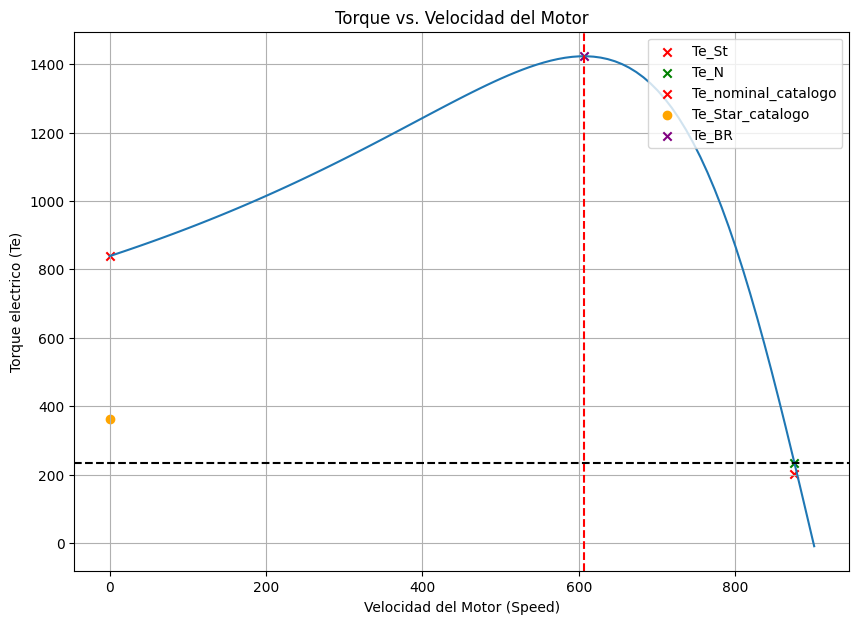

In [ ]:
Speed = np.linspace(0, 901, 100)

Sn_plot=(Ns-Speed)/Ns

Te_PLOT = (((3*(Vth**2))*(Rr_St/Sn_plot))/((Ws*((Rth + (Rr_St/Sn_plot))**2+((Xth + Xr_St)**2)))))


plt.figure(figsize=(10, 7))
plt.plot(Speed, Te_PLOT)
plt.xlabel('Velocidad del Motor (Speed)')
plt.ylabel('Torque electrico (Te)')
plt.title('Torque vs. Velocidad del Motor')

plt.axhline(y=Te_N, xmax=882, linestyle='--', color='black')
plt.axvline(x=((1-SBR)*Ns), ymax=Te_Br, linestyle='--', color='red')
plt.scatter(0, Te_ST , marker= 'x', color='red', label= 'Te_St')
plt.scatter(875, Te_N, marker= 'x', color='green', label= 'Te_N')
plt.scatter(Nr, Tn , marker= 'x', color='red', label='Te_nominal_catalogo')
plt.scatter(0, Tl , marker= 'o', color='orange', label='Te_Star_catalogo')
plt.scatter(((1-SBR)*Ns), Te_Br , marker= 'x', color='purple', label= 'Te_BR')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# **<font color="blue"><center>Variando la frecuencia a 50 hz, 20 hz y 75hz**

In [ ]:
Fe = [50, 20, 75]
Ve = 127
if Fe[-1] >= 60:
    Ve_m = Ve / 60
else:
    Ve_m = 0
Ve_Fe = [(Ve_m * valor) for valor in Fe[:-1]] + [127]

print(Ve_Fe)

[105.83333333333333, 42.333333333333336, 127]


In [ ]:
Ns_new1 = []
for valor in Fe:
  Ns_new = (valor*60)/4
  Ns_new1.append(Ns_new)

print(Ns_new1)


[750.0, 300.0, 1125.0]


# **<font color="blue"><center>Reactancias inductivas para cada frecuencia**



In [ ]:
Rs = 0.0

Xs_new1 = []
for valor2 in Fe:
  Xs_new = (2*np.pi*valor2)*(0.2583*(10**-3))
  Xs_new1.append(Xs_new)
print(Xs_new1)

Xm_new1 = []
for valor2 in Fe:
  Xm_new = (2*np.pi*valor2)*(5.8147*(10**-3))
  Xm_new1.append(Xm_new)
print(Xm_new1)

R1 = 0.0789

X1_new1 = []
for valor2 in Fe:
  X1_new = (2*np.pi*valor2)*(1.0783*(10**-3))
  X1_new1.append(X1_new)
print(X1_new1)

R2 = 0.0804

X2_new1 = []
for valor2 in Fe:
  X2_new = (2*np.pi*valor2)*(0.2583*(10**-3))
  X2_new1.append(X2_new)
print(X2_new1)


[0.08114733824222435, 0.03245893529688974, 0.12172100736333653]
[1.826741880282857, 0.7306967521131428, 2.7401128204242853]
[0.3387579358365875, 0.13550317433463496, 0.5081369037548812]
[0.08114733824222435, 0.03245893529688974, 0.12172100736333653]


# **<font color="blue"><center>Torque electrico para cada frecuencia**

In [ ]:
## para 50 hz y 750 RPM

Vth_50hz =((Ve_Fe[0])*(((Xm_new1[0])/((Rs**2)+(((Xs_new1[0])+(Xm_new1[0]))**2))**0.5)))
print(Vth_50hz)

Zth_50_hz = (((complex(0, Xm_new1[0]))*(Rs + complex(0, Xs_new1[0]))/(Rs + (complex(0, Xs_new1[0])+ complex(0, Xm_new1[0])))))
Rth_50 = Zth_50_hz.real
Xth_50 = Zth_50_hz.imag

Ws_50hz = ((2*np.pi)/60)*Ns_new1[0]
print(Ws_50hz)


Te_50 = (((3*(Vth_50hz**2))*(Rr_N))/((Ws_50hz*((Rth_50 + (Rr_N))**2+((Xth_50 + Xr_N)**2)))))
print(Te_50)


101.33197486140843
78.53981633974483
195.60548593753944


In [ ]:
## para 20 hz y 300 RPM

Vth_20hz =((Ve_Fe[1])*(((Xm_new1[1])/((Rs**2)+(((Xs_new1[1])+(Xm_new1[1]))**2))**0.5)))
print(Vth_20hz)

Zth_20_hz = (((complex(0, Xm_new1[1]))*(Rs + complex(0, Xs_new1[1]))/(Rs + (complex(0, Xs_new1[1])+ complex(0, Xm_new1[1])))))
Rth_20 = Zth_20_hz.real
Xth_20 = Zth_20_hz.imag

Ws_20hz = ((2*np.pi)/60)*Ns_new1[1]
print(Ws_20hz)


Te_20 = (((3*(Vth_20hz**2))*(Rr_N))/((Ws_20hz*((Rth_20 + (Rr_N))**2+((Xth_20 + Xr_N)**2)))))
print(Te_20)

40.53278994456337
31.41592653589793
78.35693938765216


In [ ]:
## para 75 hz y 1125 RPM

Vth_75hz =((Ve_Fe[2])*(((Xm_new1[2])/((Rs**2)+(((Xs_new1[2])+(Xm_new1[2]))**2))**0.5)))
print(Vth_75hz)

Zth_75_hz = (((complex(0, Xm_new1[2]))*(Rs + complex(0, Xs_new1[2]))/(Rs + (complex(0, Xs_new1[2])+ complex(0, Xm_new1[2])))))
Rth_75 = Zth_75_hz.real
Xth_75 = Zth_75_hz.imag

Ws_75hz = ((2*np.pi)/60)*Ns_new1[2]
print(Ws_75hz)


Te_75 = (((3*(Vth_75hz**2))*(Rr_N))/((Ws_75hz*((Rth_75 + (Rr_N))**2+((Xth_75 + Xr_N)**2)))))
print(Te_75)

121.5983698336901
117.80972450961724
187.39754073234747


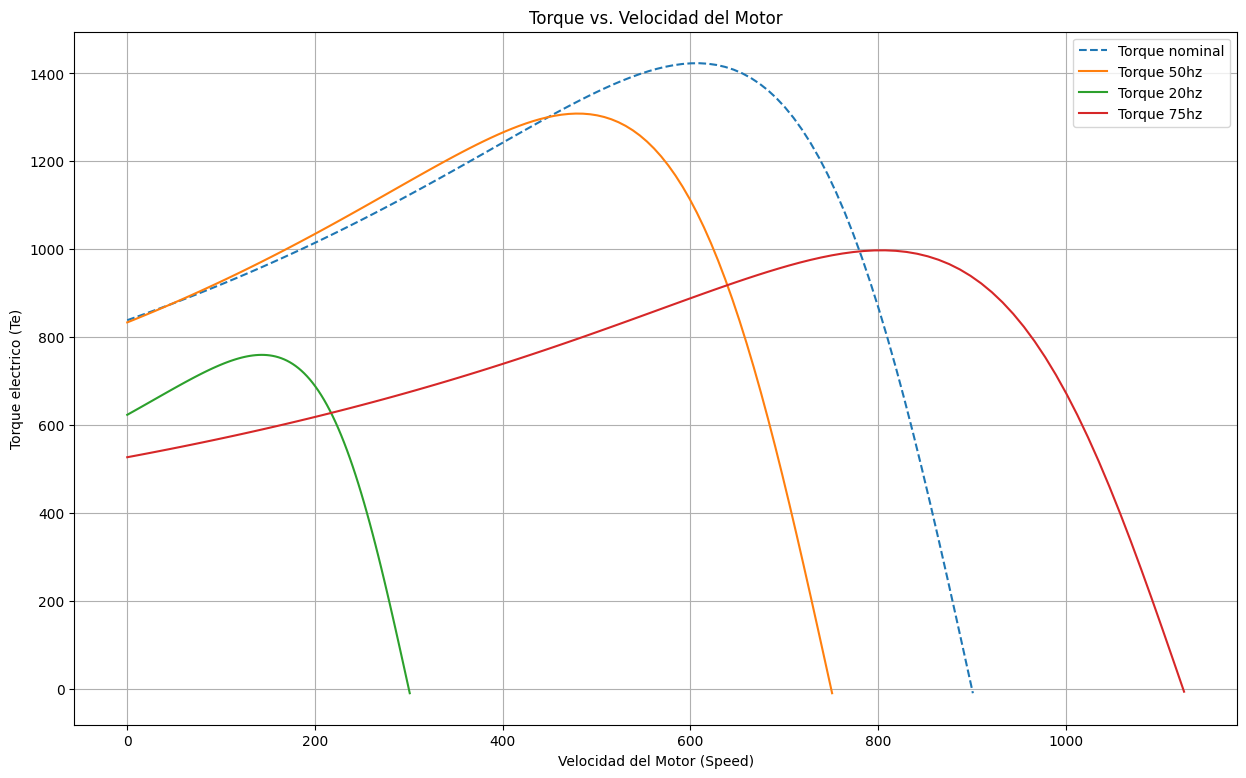

In [ ]:

Speed = np.linspace(0, 901, 100)
Sn_plot=(Ns-Speed)/Ns

Speed2 = np.linspace(0, 751, 100)
Sn_plot2=(Ns_new1[0]-Speed2)/Ns_new1[0]

Speed3 = np.linspace(0, 301, 100)
Sn_plot3=(Ns_new1[1]-Speed3)/Ns_new1[1]

Speed4 = np.linspace(0, 1126, 100)
Sn_plot4=(Ns_new1[2]-Speed4)/Ns_new1[2]



Te_PLOT = (((3*(Vth**2))*(Rr_St/Sn_plot))/((Ws*((Rth + (Rr_St/Sn_plot))**2+((Xth + Xr_St)**2)))))

Te_PLOT = (((3*(Vth**2))*(Rr_St/Sn_plot))/((Ws*((Rth + (Rr_St/Sn_plot))**2+((Xth + Xr_St)**2)))))
Te_50 = (((3*(Vth_50hz**2))*(Rr_St/Sn_plot2))/((Ws_50hz*((Rth_50 + (Rr_St/Sn_plot2))**2+((Xth_50 + Xr_St)**2)))))
Te_20 = (((3*(Vth_20hz**2))*(Rr_St/Sn_plot3))/((Ws_20hz*((Rth_20 + (Rr_St/Sn_plot3))**2+((Xth_20 + Xr_St)**2)))))
Te_75 = (((3*(Vth_75hz**2))*(Rr_St/Sn_plot4))/((Ws_75hz*((Rth_75 + (Rr_St/Sn_plot4))**2+((Xth_75 + Xr_St)**2)))))

plt.figure(figsize=(15, 9))
plt.plot(Speed, Te_PLOT, linestyle = '--', label = 'Torque nominal')
plt.xlabel('Velocidad del Motor (Speed)')
plt.ylabel('Torque electrico (Te)')
plt.title('Torque vs. Velocidad del Motor')
plt.plot(Speed2, Te_50, label = 'Torque 50hz')
plt.plot(Speed3, Te_20, label = 'Torque 20hz')
plt.plot(Speed4, Te_75, label = 'Torque 75hz')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()